In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('TM_2021.csv')

print(df.head())

                            Medication_Name  Package_Size  Max_Retailer_Price  \
0        ABBOSYNAGIS 100MG PUL FOR INJ+SOLV           1.0         2773.982856   
1         ABBOSYNAGIS 50MG PUL FOR INJ+SOLV           1.0         1510.741970   
2  ABELCET 5MG/ML 10 VIAL 20ML (100MG/20ML)          10.0         3689.913060   
3             ABILIFY  MAINTENA 300 MG VIAL           1.0         1145.176625   
4     ABILIFY MAINTENA 400 MG/PREFILLED SYR           1.0          931.723432   

   Max_Consumer_Price  Max_Consumer_VAT_Price  Year  
0         3051.381142             3570.115805  2021  
1         1775.121815             2076.892447  2021  
2         4058.904366             4748.917934  2021  
3         1345.582534             1574.331508  2021  
4         1094.775033             1280.886741  2021  


In [16]:
df.isnull().values.any() # determine if value in series missing

True

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3186 entries, 0 to 3185
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Medication_Name         3186 non-null   object 
 1   Package_Size            3186 non-null   float64
 2   Max_Retailer_Price      2984 non-null   float64
 3   Max_Consumer_Price      2984 non-null   float64
 4   Max_Consumer_VAT_Price  2984 non-null   float64
 5   Year                    3186 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 149.5+ KB


In [18]:
df.isnull().sum() # how many missing values

Medication_Name             0
Package_Size                0
Max_Retailer_Price        202
Max_Consumer_Price        202
Max_Consumer_VAT_Price    202
Year                        0
dtype: int64

In [19]:
df = df.dropna()

In [20]:
# transform all data to numeric
df['Medication_Name'] = pd.factorize(df.Medication_Name)[0]

In [21]:
df.head()

,Medication_Name,Package_Size,Max_Retailer_Price,Max_Consumer_Price,Max_Consumer_VAT_Price,Year
0,0,1.0,2773.982856,3051.381142,3570.115805,2021
1,1,1.0,1510.741970,1775.121815,2076.892447,2021
2,2,10.0,3689.913060,4058.904366,4748.917934,2021
3,3,1.0,1145.176625,1345.582534,1574.331508,2021
4,4,1.0,931.723432,1094.775033,1280.886741,2021


In [22]:
import numpy as mp

import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Correlation Heatmap')

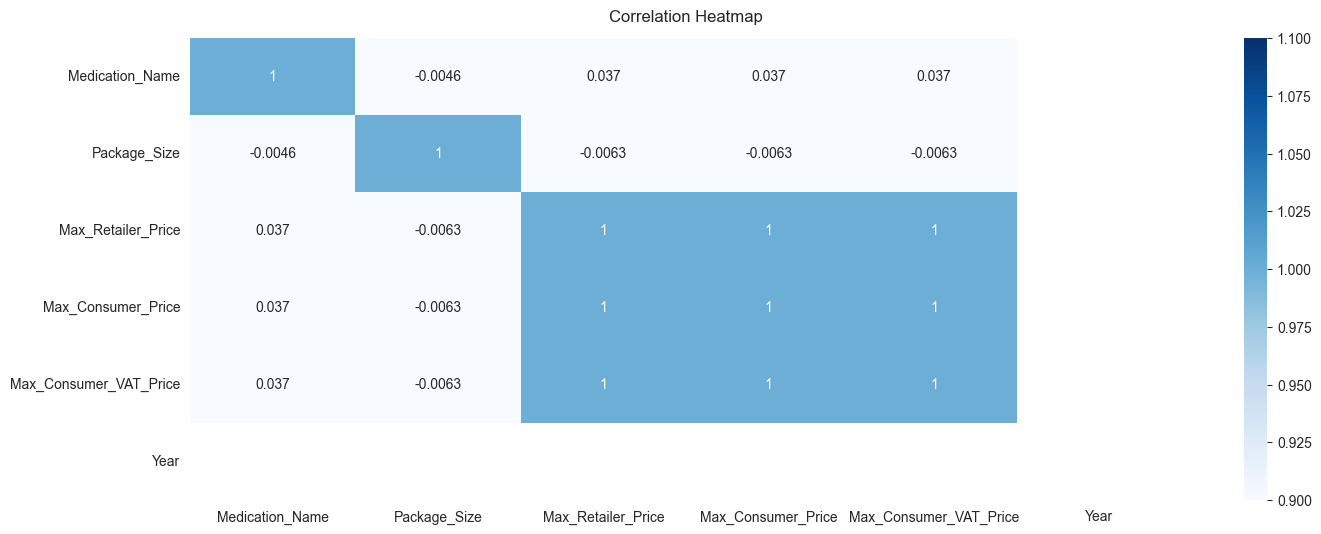

In [23]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

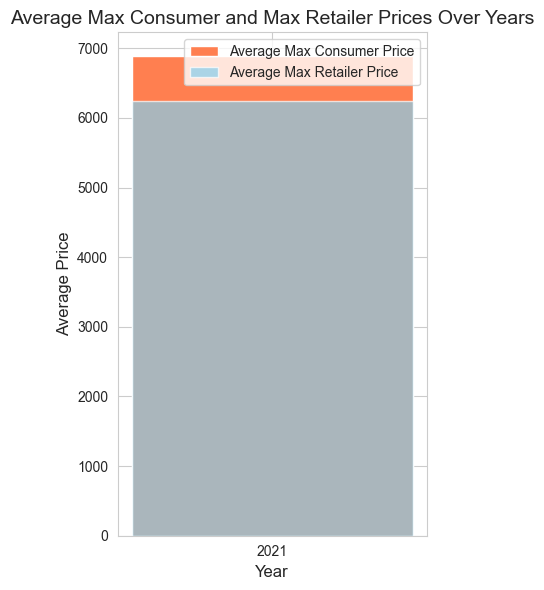

In [24]:
# Group by 'Year' and calculate the mean for 'Max_Consumer_Price' and 'Max_Retailer_Price'
yearly_prices = df.groupby('Year')[['Max_Consumer_Price', 'Max_Retailer_Price']].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(4, 6))

# Set the positions of the bars on the x-axis
years = yearly_prices['Year']
bar_width = 0.35

# Plot 'Max_Consumer_Price'
plt.bar(years, yearly_prices['Max_Consumer_Price'], bar_width, label='Average Max Consumer Price', color='coral')

# Plot 'Max_Retailer_Price' next to 'Max_Consumer_Price'
plt.bar(years, yearly_prices['Max_Retailer_Price'], bar_width, label='Average Max Retailer Price', color='skyblue', alpha=0.7)

# Customize the plot
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.title('Average Max Consumer and Max Retailer Prices Over Years', fontsize=14)
plt.xticks(years)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2984 entries, 0 to 3185
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Medication_Name         2984 non-null   int64  
 1   Package_Size            2984 non-null   float64
 2   Max_Retailer_Price      2984 non-null   float64
 3   Max_Consumer_Price      2984 non-null   float64
 4   Max_Consumer_VAT_Price  2984 non-null   float64
 5   Year                    2984 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 163.2 KB


In [27]:
X = df[['Max_Consumer_Price', 'Max_Consumer_VAT_Price']]
y = df['Max_Retailer_Price']

# Split the dataset into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 561.2061716141162
R-squared: 0.9999999944252468


The Mean Squared Error is a measure of the average squared difference between predicted and actual values. It provides a way to quantify the overall accuracy of your model.

In your case, a MSE of 561.2061716141162 means that, on average, the squared difference between the predicted Max Retailer Prices and the actual Max Retailer Prices on the test set is 561.21.

R-squared is a measure of how well the predicted values match the actual values. It represents the proportion of the variance in the dependent variable that is predictable from the independent variables.

An R-squared value close to 1 indicates a good fit, and a value close to 0 indicates a poor fit. In your case, an R-squared value of 0.9999999944252468 is extremely close to 1, suggesting an almost perfect fit of the model to the data.

In summary, based on the provided metrics, your model seems to perform very well on the test set, showing a high degree of accuracy in predicting Max Retailer Prices.

In [28]:
predicted_price = model.predict([[3051, 3570]])
print(f'Predicted Max Retailer Price: {predicted_price[0]}')

Predicted Max Retailer Price: 208339809.52935728


/Users/aristarcharistarchovich/DataspellProjects/newPython/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
from sklearn.linear_model import Ridge

# Create a Ridge regression model
ridge = Ridge()

# Define a range of alpha values to test
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Use GridSearchCV to find the best alpha value
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameter values
best_alpha = grid_search.best_params_['alpha']

# Create a Ridge model with the best alpha value
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = best_ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Best Alpha: {best_alpha}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Best Alpha: 100
Mean Squared Error: 539.4231067657654
R-squared: 0.9999999946416293


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# Assuming your data is in a CSV file, you can read it into a DataFrame
# Replace 'your_data.csv' with the actual file path or URL
df = pd.read_csv('TM_2021.csv')
df = df.dropna()
# Selecting features and target variable
X = df[['Max_Consumer_Price', 'Max_Consumer_VAT_Price']]  # Features
y = df['Max_Retailer_Price']  # Target variable

# Split the dataset into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge regression model with the optimal alpha
optimal_alpha = 10  # Replace with the optimal alpha value you obtained
ridge_model = Ridge(alpha=optimal_alpha)

# Train the model on the training set
ridge_model.fit(X_train, y_train)

# Assume 'new_data' is the new data for prediction (replace with your data)
new_data = pd.DataFrame({'Max_Consumer_Price': [3051], 'Max_Consumer_VAT_Price': [3570]})

# Make predictions on the new data
predictions = ridge_model.predict(new_data)

# Display the predictions
print("Predictions for new data:")
print(predictions)


Predictions for new data:
[2757.51697381]


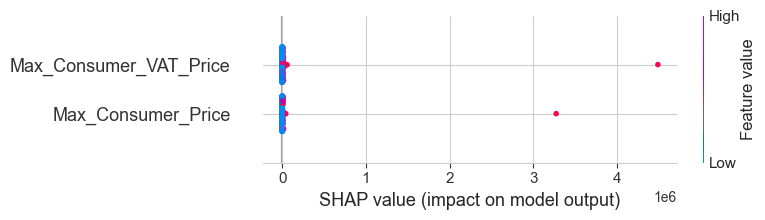

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import shap

# Assuming your data is in a CSV file, you can read it into a DataFrame
# Replace 'your_data.csv' with the actual file path or URL
df = pd.read_csv('TM_2021.csv')
df = df.dropna()
# Selecting features and target variable
X = df[['Max_Consumer_Price', 'Max_Consumer_VAT_Price']]  # Features
y = df['Max_Retailer_Price']  # Target variable

# Split the dataset into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge regression model with the optimal alpha
optimal_alpha = 10  # Replace with the optimal alpha value you obtained
ridge_model = Ridge(alpha=optimal_alpha)

# Train the model on the training set
ridge_model.fit(X_train, y_train)

# Use a linear explainer for Ridge model with SHAP
explainer = shap.LinearExplainer(ridge_model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values for a single prediction (change index as needed)
shap.summary_plot(shap_values, X_test)


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from lime.lime_tabular import LimeTabularExplainer

# Assuming your data is in a CSV file, you can read it into a DataFrame
# Replace 'your_data.csv' with the actual file path or URL
df = pd.read_csv('TM_2021.csv')
df = df.dropna()
# Selecting features and target variable
X = df[['Max_Consumer_Price', 'Max_Consumer_VAT_Price']]  # Features
y = df['Max_Retailer_Price']  # Target variable

# Split the dataset into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge regression model with the optimal alpha
optimal_alpha = 10  # Replace with the optimal alpha value you obtained
ridge_model = Ridge(alpha=optimal_alpha)

# Train the model on the training set
ridge_model.fit(X_train, y_train)

# LIME explainer
explainer = LimeTabularExplainer(X_train.values, mode='regression', feature_names=X_train.columns)

# Choose an instance for explanation (change index as needed)
instance_index = 0
instance = X_test.iloc[instance_index]

# Explain the prediction
explanation = explainer.explain_instance(instance.values, ridge_model.predict, num_features=len(X_train.columns))

# Visualize the explanation
explanation.show_in_notebook(show_table=True)

X does not have valid feature names, but Ridge was fitted with feature names
